In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import warnings
warnings.simplefilter('ignore')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


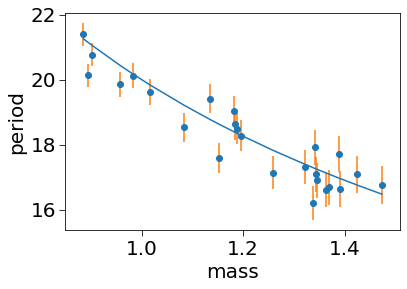

In [2]:
npts = 25
mass = np.sort(np.random.randn(npts) * 0.2 + 1.2)
period_true = 2.0 * 10**1.0 * mass**-0.5
period_spread = period_true + .2 * np.random.randn(len(mass))

obs_noise = mass * 0.4 * np.random.randn(npts)
sigma = mass * 0.4

obs_period = obs_noise + period_spread
fig, ax = plt.subplots()
ax.plot(mass, period_true)
ax.scatter(mass, obs_period,zorder=1)
ax.errorbar(mass, obs_period, yerr=sigma, fmt='|',zorder=0)
ax.set_xlabel('mass')
ax.set_ylabel('period')
plt.show()

In [3]:
simple = pm.Model()
X = mass[:, None]
y = obs_period

with simple:
    alpha = pm.HalfNormal('alpha', 1)
    rho = pm.InverseGamma('rho', 5., 5.)
    m0 = pm.Normal('gradient0', -10, 3)
    c0 = pm.Normal('intercept0', 25, 10)
    
    mean_func = pm.gp.mean.Linear(coeffs=m0, intercept=c0)     #Define the mean function
    cov_func = alpha**2 * pm.gp.cov.ExpQuad(input_dim=1, ls=rho) #Define the covariance function
    gp = pm.gp.Latent(mean_func=mean_func, cov_func=cov_func)
    
    f = gp.prior("f", X=X)
    
    yobs = pm.Normal('y_obs', f, sigma, observed=y)

In [4]:
with simple:
    trace = pm.sample(draws=1000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [f_rotated_, intercept0, gradient0, rho, alpha]
Sampling 2 chains: 100%|██████████| 6000/6000 [01:45<00:00, 56.69draws/s]
There were 45 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7159930960941692, but should be close to 0.8. Try to increase the number of tuning steps.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [5]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
gradient0,-7.939364,1.208654,0.073151,-10.651407,-5.347329,138.464225,1.001069
intercept0,27.948941,1.645488,0.105329,25.380256,32.500497,113.813155,1.006213
f_rotated___0,-0.157303,0.933872,0.030472,-1.888904,1.641989,798.595865,1.002095
f_rotated___1,0.003504,0.975134,0.034268,-1.730941,2.018765,709.982426,0.999537
f_rotated___2,0.066284,0.974121,0.025127,-1.861233,1.897679,1547.393057,1.000205
f_rotated___3,0.057552,1.051747,0.031178,-1.930552,2.150755,880.855879,1.000167
f_rotated___4,0.133177,0.943549,0.024561,-1.662235,1.988507,1550.688145,1.000452
f_rotated___5,0.098904,1.010558,0.028507,-1.878677,2.060557,936.632224,1.001027
f_rotated___6,0.087266,0.947267,0.024136,-1.708453,2.005599,1502.379477,1.000964
f_rotated___7,0.092694,1.025917,0.035223,-1.745209,2.250653,570.336709,0.999885


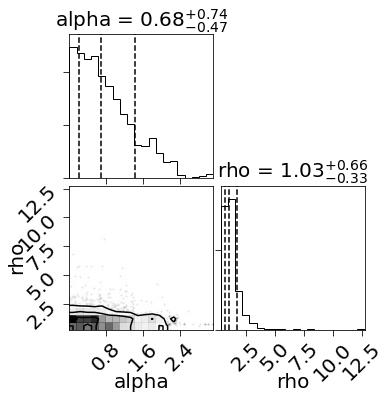

In [7]:
import corner
labels=['alpha','rho']
chain = np.array([trace[label] for label in labels])
corner.corner(chain.T, labels=labels,
              quantiles=[0.16, 0.5, 0.84],show_titles=True)
plt.show()

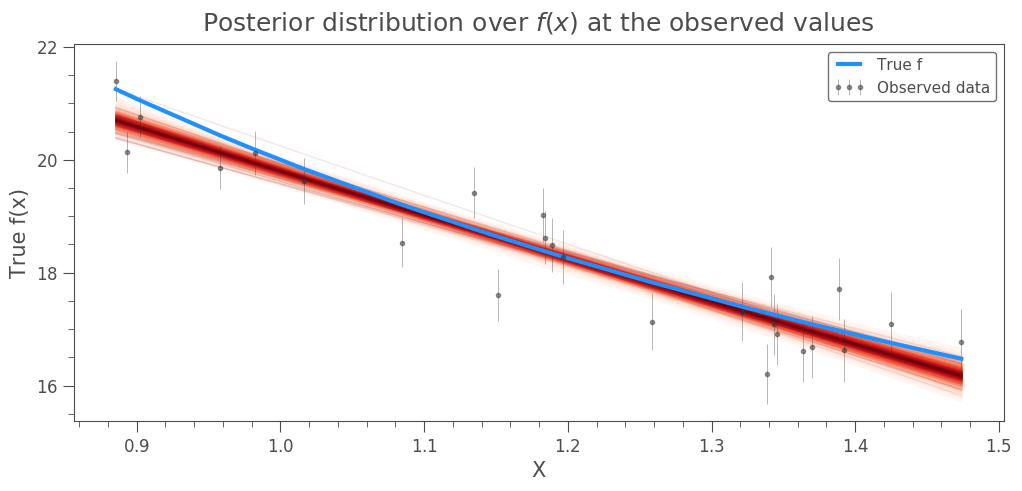

In [17]:
import mystyle
with plt.style.context(mystyle.ms):
    fig = plt.figure(figsize=(12,5)); ax = fig.gca()

    from pymc3.gp.util import plot_gp_dist
    plot_gp_dist(ax, trace["f"], X);

    # plot the data and the true latent function
    plt.plot(X, period_true, "dodgerblue", lw=3, label="True f");
    plt.errorbar(X, y, yerr=sigma, fmt='o', ms=3, alpha=0.5, label="Observed data");

    # axis labels and title
    plt.xlabel("X"); plt.ylabel("True f(x)");
    plt.title("Posterior distribution over $f(x)$ at the observed values"); plt.legend();